<a href="https://colab.research.google.com/github/kdmwangi/CODSOFT/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction Model
<img src="https://esq.h-cdn.co/assets/16/16/1600x798/gallery-1460987104-titanic.JPG"/>

The dataset is pulled from kaggle and the overall tasks is to use it to build a model that predicts whether a passenger on the titanic survived or not.

The data includes information about individual passengers; age, gender, ticket class, fare, cabin and whether or not they survived or not.

# Data Exploration and Cleaning

In [79]:
# first step would be to import the data set to google colab
# import the necessary libraries, pandas, numpy, matplotlib, sklearn, plotly
# check for NaN values in the dataframe
import pandas as pd

import numpy
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [2]:
# read the data first
# use the pandas read_csv method
titanic_df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# display the data frame head and tail
# check the number of rows and column
# check the column head
# give a brief overview of data using the info() method
# shape property


titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_df.shape
print(type(titanic_df.shape))


<class 'tuple'>


In [6]:
# describe the data frame rows and columns
print(f'Titanic dataset has {titanic_df.shape[0]} rows and {titanic_df.shape[1]} columns')

Titanic dataset has 891 rows and 12 columns


In [7]:
# what are the columns names present in the dataset
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# brief info about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# check the data type of every column in the dataset
# loop of the tuple when accessing the columns
# access the individual columns and use index to access the first element
for col in titanic_df.columns:
    print(col, type(titanic_df[col][0]))

PassengerId <class 'numpy.int64'>
Survived <class 'numpy.int64'>
Pclass <class 'numpy.int64'>
Name <class 'str'>
Sex <class 'str'>
Age <class 'numpy.float64'>
SibSp <class 'numpy.int64'>
Parch <class 'numpy.int64'>
Ticket <class 'str'>
Fare <class 'numpy.float64'>
Cabin <class 'float'>
Embarked <class 'str'>


In [11]:
# you can use pandas dtypes to check the type of the dataframe columns
titanic_df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
# check for NaN values in the dataset
# isna method return NaN values in the dataset
titanic_df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# a better descriptive way to check for NaN values would be to use the any()
#  its similar to all() python method that returns True if  all elements are
# True and False otherwise.

titanic_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
# from the above data we can tell that Age, Cabin, Embarked contain NaN values
# next step will be to clean the data to remove the values using dropna method
clean_titanic_df = titanic_df.dropna()
# use the reset_index(drop=True) to rearrange elements after drop the NaN elements
clean_titanic_df.reset_index(drop=True,inplace=True)

In [15]:
# check if the cleaning was successful
clean_titanic_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [16]:
# the next stage would be to check if there are any duplicates in dataset
# for this we are also going to call the any method that checks whether there are
# duplicate values if any it return true
clean_titanic_df.duplicated().any()

False

In [17]:
clean_titanic_df.iloc[1]
titanic_dup = clean_titanic_df+clean_titanic_df.iloc[0]


In [18]:
clean_titanic_df.duplicated().any()

False

In [19]:
clean_titanic_df.shape

(183, 12)

In [20]:
titanic_dup.shape

(183, 12)

In [21]:
titanic_dup.duplicated().any()

False

In [22]:
titanic_df.shape

(891, 12)

In [23]:
# you can always use the sum() method together with duplicated to find the
#  number of duplicate values in the dataset
# from the above example I created another dataframe and append to it the
# row at index 1 using iloc that take index as attribute
# then performing duplicated method just as a brief example
titanic_dup.duplicated().sum()

0

In [24]:
titanic_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [25]:
# the challenge with the dataset is that when we drop all NaN values we remain
# with a very small dataset to analyze, to my thinking we can maybe drop the
# column all of which is dependable with the prediction or the model in question
# we should understand that the aim of the dataset is to build a strong
#  classification model to predict if passenger survives or not
# take a good look at the strong variable or dependables
# check how to trim the data to eliminate the columns that you probably do not
#  want to analyze
# convert the different columns type e.g age to int

titanic_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [26]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
# trim the data to use only the columns that do not have NaN values
# check NaN values in Age column
titanic_df['Embarked'].isna().sum()

2

In [28]:
# drop the NaN values in Age
clean_df = titanic_df['Age'].dropna()
titanic_df['Age'].isna().sum()

177

In [29]:
clean_titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [30]:
clean_titanic_df.shape

(183, 12)

In [31]:
titanic_df.Cabin.isna().sum()

687

create a model by dropping all the NaN values
the next sample drop the NaN values in Age only and omit the Cabin column since it has most NaN values.

In [32]:
# use the sample data set by dropping all the NaN values
clean_titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [33]:
# average fare of the titanic
clean_titanic_df['Fare'].mean()

78.68246885245901

In [34]:
clean_titanic_df[clean_titanic_df['Fare'] > 10].min()

PassengerId                                2
Survived                                   0
Pclass                                     1
Name           Allen, Miss. Elisabeth Walton
Sex                                   female
Age                                     0.92
SibSp                                      0
Parch                                      0
Ticket                                110152
Fare                                 10.4625
Cabin                                    A10
Embarked                                   C
dtype: object

In [35]:
grouped_titanic = clean_titanic_df.groupby(by='Pclass').count()

In [36]:
grouped_titanic.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,158,158,158,158,158,158,158,158,158,158,158
2,15,15,15,15,15,15,15,15,15,15,15
3,10,10,10,10,10,10,10,10,10,10,10


there is a challenge with the data since it contains float numbers which indicate the there were children under 1yrs

In [37]:
clean_titanic_df['Age'].astype('int')

0      38
1      35
2      54
3       4
4      58
       ..
178    47
179    33
180    56
181    19
182    26
Name: Age, Length: 183, dtype: int64

In [38]:
clean_titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The oldest person to Survive on the titanic

In [39]:
cleaned_grp = clean_titanic_df.groupby(by='Survived').count()

In [40]:
cleaned_grp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,60,60,60,60,60,60,60,60,60,60,60
1,123,123,123,123,123,123,123,123,123,123,123


In [41]:
# number of male vs female in dataset
# value_counts is a combination of groupby().count()
# you should specify the column ie it works on a Series not a Dataframe
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [42]:
male_female = titanic_df.groupby(by='Sex').count()

the percentage of male and female in the titanic aboard

In [43]:
fig = px.pie(male_female,names=male_female.index, values='PassengerId',
             title="Percentage of male vs female onboard",hole=0.4,
             labels=male_female.index)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


Oldest and youngest passengers

In [44]:
clean_titanic_df['Age'].idxmax()
oldest = clean_titanic_df.iloc[clean_titanic_df['Age'].idxmax()]
youngest = clean_titanic_df.iloc[clean_titanic_df['Age'].idxmin()]
print(f'the oldest passenger was {oldest["Name"]}, {int(oldest["Age"])} years old')
print(f'the youngest passenger was {youngest["Name"]}, {int(youngest["Age"] * 12)} months old')

the oldest passenger was Barkworth, Mr. Algernon Henry Wilson, 80 years old
the youngest passenger was Allison, Master. Hudson Trevor, 11 months old


In [45]:
titanic_df['Age'].idxmax()
oldest = titanic_df.iloc[titanic_df['Age'].idxmax()]
youngest = titanic_df.iloc[titanic_df['Age'].idxmin()]
print(f'the oldest passenger was {oldest["Name"]}, {int(oldest["Age"])} years old')
print(f'the youngest passenger was {youngest["Name"]}, {int(youngest["Age"] * 12)} months old')

the oldest passenger was Barkworth, Mr. Algernon Henry Wilson, 80 years old
the youngest passenger was Thomas, Master. Assad Alexander, 5 months old


# **group the data and check how many men to women survived**




In [46]:
# use [[]] to access more than two columns
# create a df for survived passengers
survived_passengers = titanic_df[titanic_df['Survived'] == True]

# titanic_df[['Sex','Survived']].groupby(by='Sex').count()
male_to_female_survivors =survived_passengers[['Survived','Sex']].groupby(by='Sex').count()
# from the data we can tell that many women survived to men
fig = px.pie(male_to_female_survivors,values=male_to_female_survivors['Survived'],
             names=male_to_female_survivors.index,title="Percentage of male vs female survivors",
             hole=0.4)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

group the  data by cabin to see if there is relationship between the survival rate

In [47]:
survivor_per_cabin = survived_passengers[['Survived','Cabin']].groupby(by='Cabin').count().sort_values(by='Survived',ascending=False)
# data shows that atleast every cabin had atleast one survivor


In [48]:
cabin_highest_survival = survived_passengers[['Survived','Cabin']].groupby(by='Cabin').count().sort_values(by='Survived',ascending=False)
print(f'the cabins with the highest survival {cabin_highest_survival[:5]}')

the cabins with the highest survival          Survived
Cabin            
B96 B98         4
F33             3
E101            3
G6              2
C126            2


# Average age of the passenger in the titanic

In [49]:
titanic_clean_age = titanic_df.dropna(subset=['Age'])
titanic_clean_age['Age'].mean()
print(f"the average age of the passengers in titanic is {titanic_clean_age['Age'].mean():.0f} years")

the average age of the passengers in titanic is 30 years


# **the average age of those who survived,you can go step further to see the oldest and youngest**

In [50]:
survived_passengers['Age'].isna().sum()

52

In [51]:
# drop the NaN value in the Age column only

clean_survived_passengers = survived_passengers.dropna(subset=['Age']).reset_index(drop=True)
clean_survived_passengers.isna().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [52]:
print(len(survived_passengers['Age']))
print(survived_passengers['Age'].mean())
print(clean_survived_passengers['Age'].isna().sum())
print(len(clean_survived_passengers['Age']))

342
28.343689655172415
0
290


In [53]:
# average age of those who survived
print(f"the average age of the survivors is {clean_survived_passengers['Age'].mean():.0f} years")

the average age of the survivors is 28 years


# **create a graph for survivors vs age**

In [54]:
# use the agg function to provide info of the survived passengers
# including the youngest and oldest
clean_survived_passengers[['Age','Sex']].groupby('Sex').agg(['min','max','mean'])

Age                 
         min   max       mean
Sex                          
female  0.75  63.0  28.847716
male    0.42  80.0  27.276022

In [55]:

youngest_surv = clean_survived_passengers.iloc[clean_survived_passengers['Age'].idxmin()]
oldest_surv = clean_survived_passengers.iloc[clean_survived_passengers['Age'].idxmax()]

print(f"the youngest survivor was {youngest_surv['Age']*12:.0f} months old and oldest was {oldest_surv['Age']:.0f} years old.")

the youngest survivor was 5 months old and oldest was 80 years old.


try to check if theres s relationship between the passenger class and the probability of survival

In [56]:
clean_survived_passengers[['Survived','Pclass']].groupby(by='Pclass').agg(['sum'])

,Survived
,sum
Pclass,
1,122
2,83
3,85


In [57]:
survivors_by_class = clean_survived_passengers[['Survived','Pclass']].groupby(by='Pclass').sum().sort_values(by='Survived')

In [58]:
fig = px.bar(survivors_by_class ,x = survivors_by_class['Survived'],
             y=survivors_by_class.index, orientation='h',
             color=survivors_by_class.index)
fig.update_yaxes(type='category')
fig.show()

Average Fare of those survived

In [59]:
clean_survived_passengers['Fare'].mean()

51.843205172413796

significant part of the data was the sibsp(number of siblings/spouse on board) and parch (number of parents/ children aboard)

In [60]:
print(clean_survived_passengers['SibSp'].isna().any())
print(clean_survived_passengers['Parch'].isna().any())

False
False


In [61]:
clean_survived_passengers[['SibSp','Survived']].groupby(by='SibSp').count()

,Survived
SibSp,
0,175
1,97
2,11
3,4
4,3


# **Number of survivors vs the number of Siblings/ spouse on board**

In [62]:
data = clean_survived_passengers[['SibSp','Survived']].groupby(by='SibSp').count()
fig = px.bar(data, x=data.index, y=data['Survived'],title='Number of survivors vs the number of Siblings/ spouse on board')
fig.update_traces()
fig.update_layout(xaxis_title="SibSp", yaxis_title="number of survivors")
fig.show()

In [63]:
clean_survived_passengers[['Parch','Survived']].groupby(by='Parch').count()

,Survived
Parch,
0,186
1,61
2,39
3,3
5,1


# **number of survivors in relation to the number of Parents or children**

In [64]:
data = clean_survived_passengers[['Parch','Survived']].groupby(by='Parch').count()
fig = px.bar(data, x=data.index, y=data['Survived'],
             title="number of survivors in relation to the number of Parents or children",
             color=data.index)
fig.update_layout(xaxis_title="Parch",yaxis_title="number of survivors")
fig.show()

In [65]:
data_parch = clean_survived_passengers[['Parch','Survived',]].groupby(by='Parch').count()
data_parch

,Survived
Parch,
0,186
1,61
2,39
3,3
5,1


In [66]:
data_sibsp = clean_survived_passengers[['SibSp','Survived']].groupby(by='SibSp').count()
data_sibsp


,Survived
SibSp,
0,175
1,97
2,11
3,4
4,3


In [67]:
data_sibsp.merge( data_parch, how='inner', on='Survived')


,Survived
0,3


# Create a model using linear regression and seaborn to predict the survival of a passenger in the titanic

<Axes: xlabel='Age', ylabel='SibSp'>

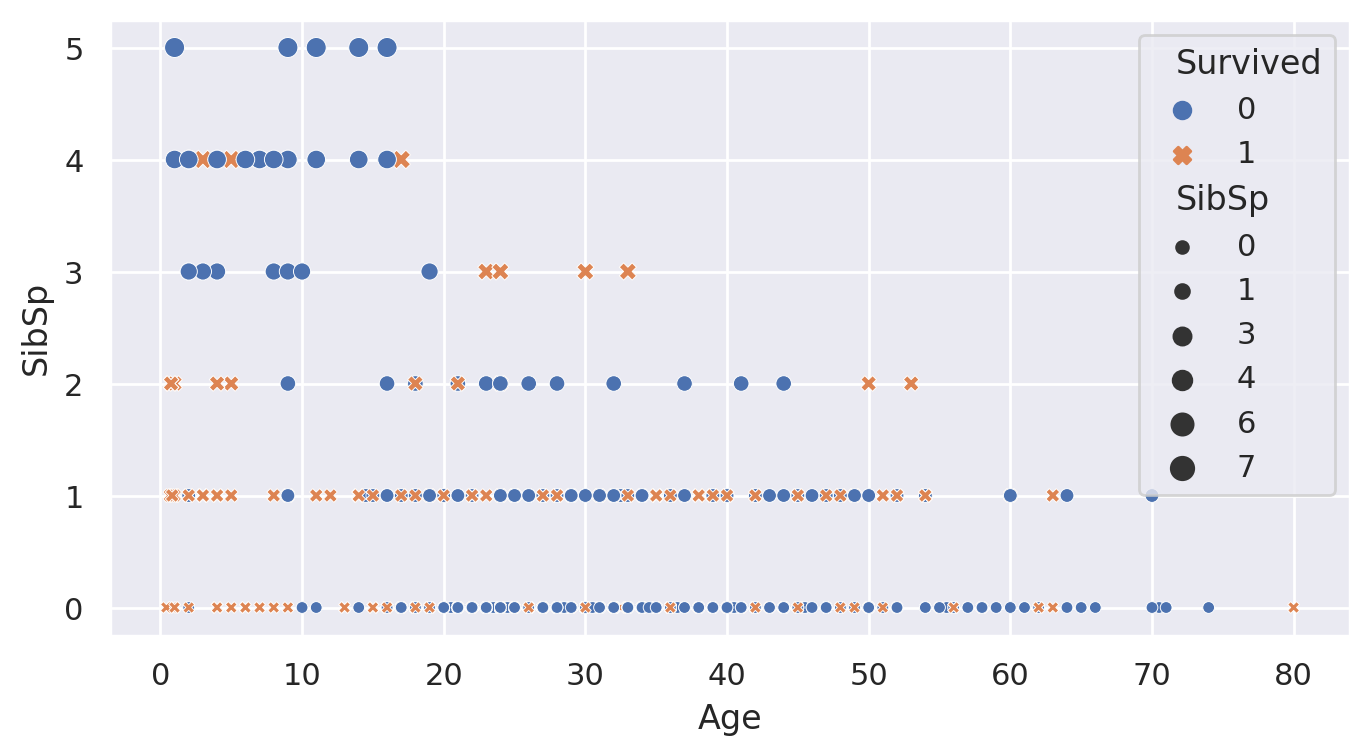

In [84]:
plt.figure(figsize=(8,4),dpi=200)
sns.set_theme()
sns.scatterplot(titanic_df, x='Age',y='SibSp', hue='Survived',style='Survived',size='SibSp')


<Axes: xlabel='Age', ylabel='Parch'>

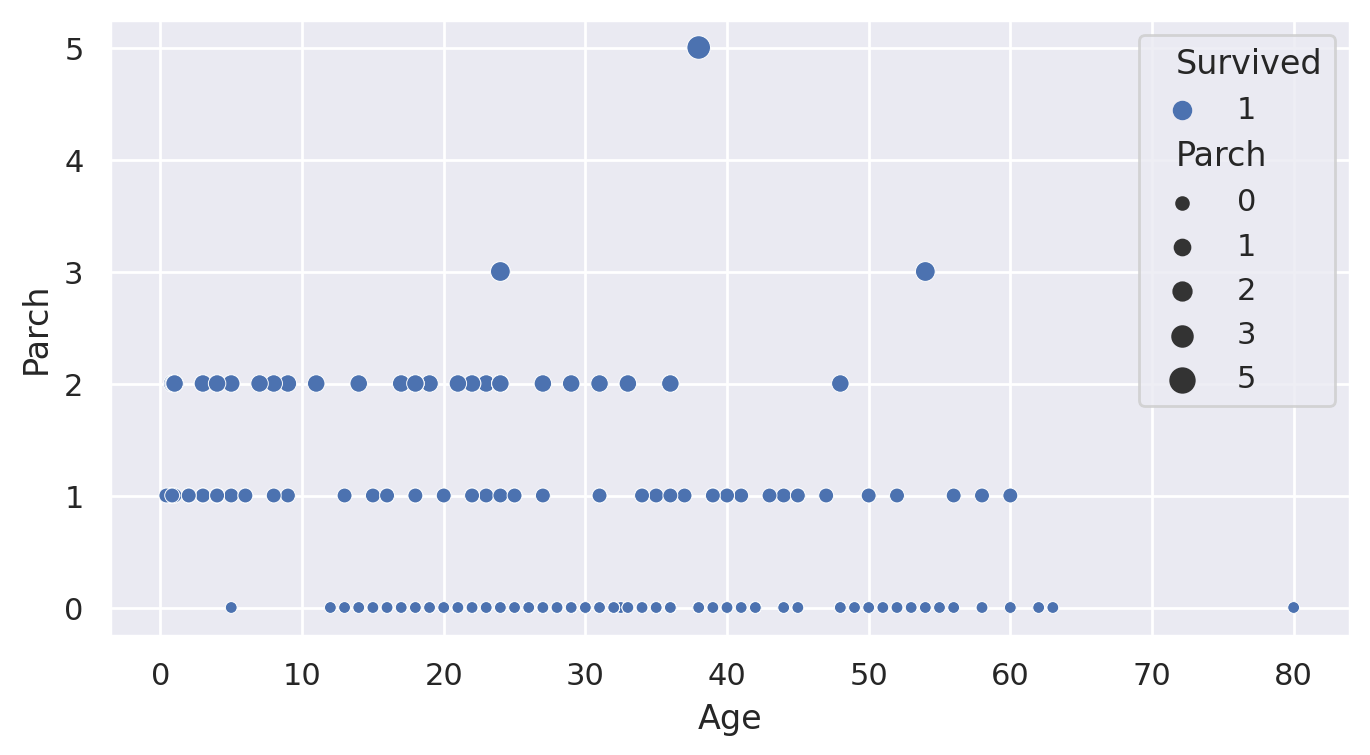

In [86]:
plt.figure(figsize=(8,4),dpi=200)
sns.set_theme()
sns.scatterplot(survived_passengers,x='Age',y='Parch',hue='Survived',size='Parch')